In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt_tab')
from collections import Counter
from wordcloud import WordCloud
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

[nltk_data] Downloading package punkt_tab to /home/ovgu/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
annotations_file = 'dataset/RISCM/captions.csv' 
caption_columns = ['caption_1', 'caption_2', 'caption_3', 'caption_4', 'caption_5'] 

print(f"Loading {annotations_file}...")
df_annotations = pd.read_csv(annotations_file)
df_annotations.columns = df_annotations.columns.str.strip() 

Loading dataset/RISCM/captions.csv...


In [3]:
# --- Basic Stats ---
num_images = len(df_annotations)
all_captions_raw = [str(cap) for col in caption_columns for cap in df_annotations[col]]
num_captions = len(all_captions_raw)
print(f"Found {num_images} images and {num_captions} captions.")

Found 44521 images and 222605 captions.


In [4]:
# --- Caption Analysis ---
stopwords = set(nltk.corpus.stopwords.words('english'))
all_tokens = [token for caption in all_captions_raw for token in nltk.word_tokenize(caption.lower())]
caption_lengths = [len(nltk.word_tokenize(caption.lower())) for caption in all_captions_raw]

Generating caption length distribution plot...


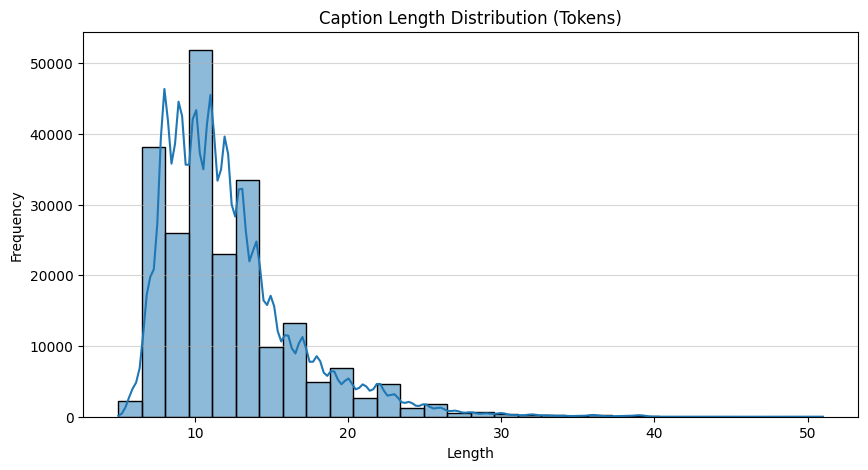

Caption Length: Avg=12.2, Median=11.0


In [5]:
# Length Distribution
print("Generating caption length distribution plot...")
plt.figure(figsize=(10, 5))
sns.histplot(caption_lengths, bins=30, kde=True)
plt.title('Caption Length Distribution (Tokens)')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()
print(f"Caption Length: Avg={np.mean(caption_lengths):.1f}, Median={np.median(caption_lengths)}")


Vocabulary Size: 4061
Generating top common words plot...


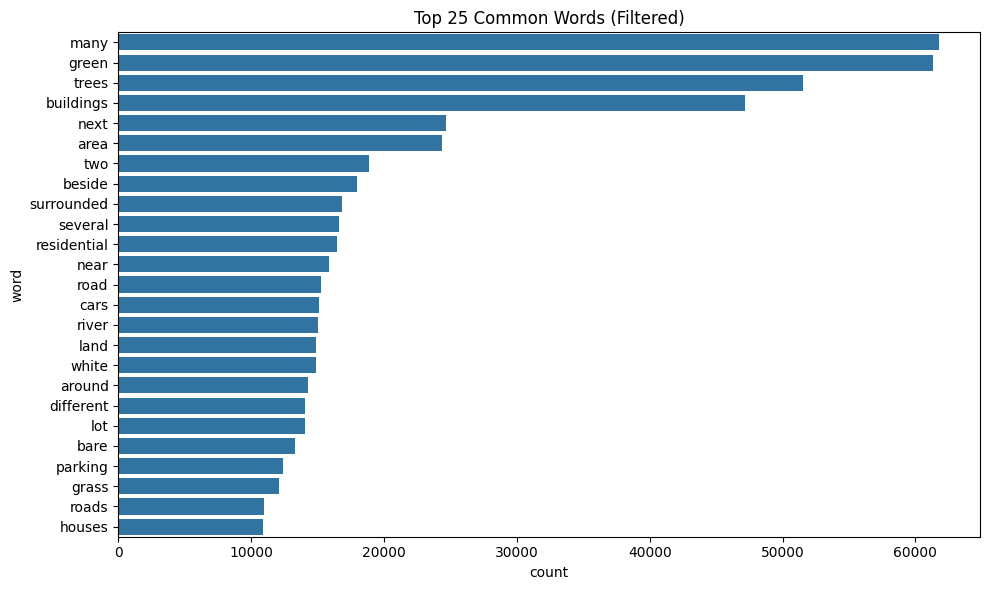

In [6]:
# Vocabulary & Common Words
word_counts = Counter(all_tokens)
vocab_size = len(word_counts)
print(f"\nVocabulary Size: {vocab_size}")

print("Generating top common words plot...")
common_words_filtered = [word for word in all_tokens if word.isalpha() and word not in stopwords]
word_counts_filtered = Counter(common_words_filtered)
common_words_filt_df = pd.DataFrame(word_counts_filtered.most_common(25), columns=['word', 'count']) # Show top 25

plt.figure(figsize=(10, 6)) # Adjusted figure size slightly
sns.barplot(x='count', y='word', data=common_words_filt_df)
plt.title('Top 25 Common Words (Filtered)')
plt.tight_layout()
plt.show()

Generating word cloud...


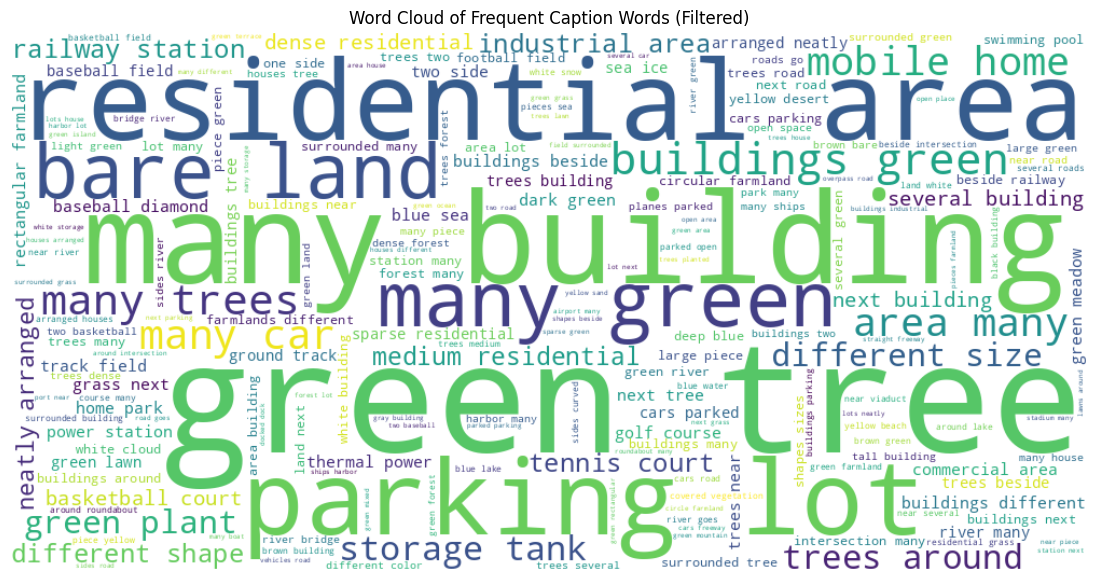


Insight-focused EDA Finished.


In [7]:
# Word Cloud
print("Generating word cloud...")
wordcloud_text = ' '.join(common_words_filtered)
wordcloud = WordCloud(width=1000, height=500, background_color='white', max_words=200).generate(wordcloud_text) # Increased size/words
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Frequent Caption Words (Filtered)')
plt.show()

print("\nInsight-focused EDA Finished.")

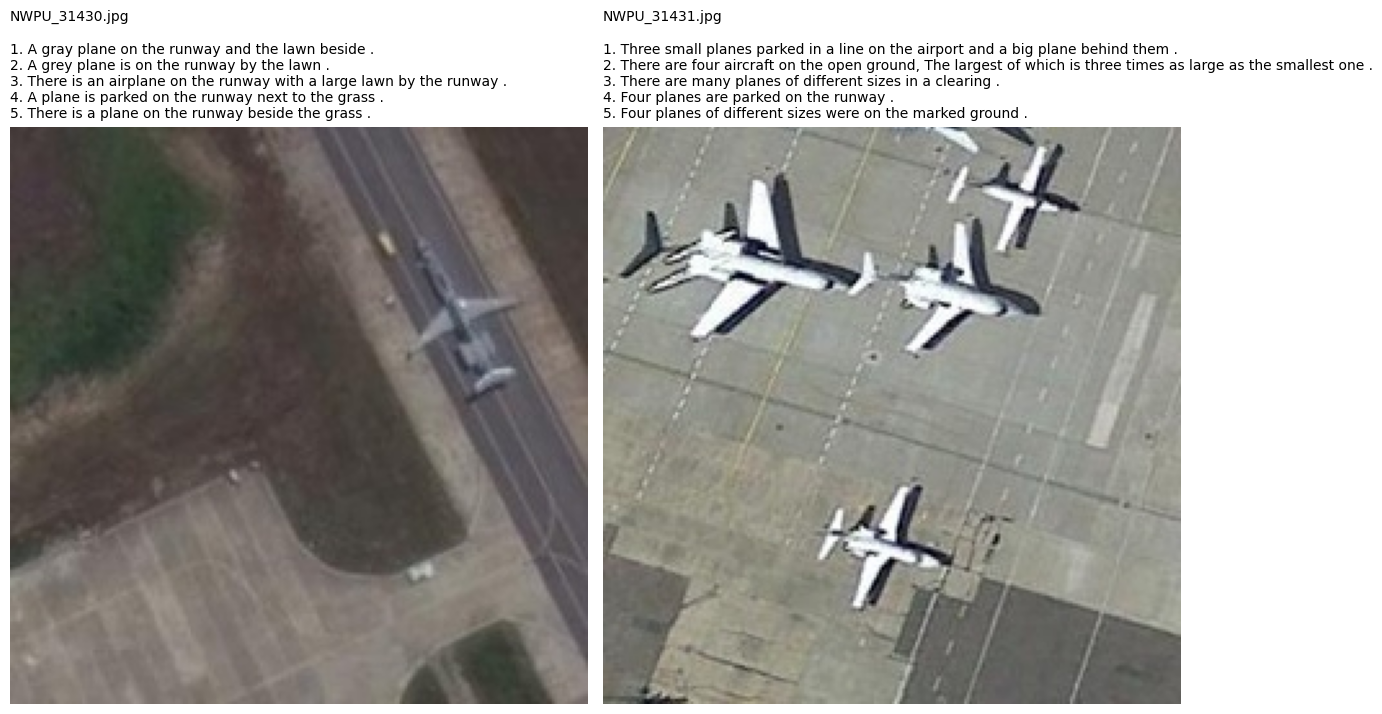

In [8]:
image_folder = 'dataset/RISCM/resized'
image_col_name = 'image'
num_samples_to_show = 2

df = pd.read_csv(annotations_file)
df.columns = df.columns.str.strip()
sample_df = df.head(num_samples_to_show) # Get the first N samples

fig, axes = plt.subplots(1, num_samples_to_show, figsize=(6 * num_samples_to_show, 7))

if num_samples_to_show == 1:
    axes = [axes] 

for i, (idx, row) in enumerate(sample_df.iterrows()):
    img_filename = row[image_col_name]
    img_path = os.path.join(image_folder, img_filename)
    img = Image.open(img_path)

    captions = [f"{j+1}. {str(row[caption_col])}" for j, caption_col in enumerate(caption_columns)]
    caption_text = "\n".join(captions)

    ax = axes[i]
    ax.imshow(img)
    ax.set_title(f"{img_filename}\n\n{caption_text}", fontsize=10, loc='left')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [9]:
image_filenames = os.listdir(image_folder)

class_types = sorted(list(set([fn.split("_")[0] 
                               for fn in image_filenames 
                               if fn.find("_") > -1])))
class_types

['NWPU', 'RSICD', 'UCM']